IMPORTING THE DEPENDENCIES REQUIRED


In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

IMPORTING THE DATASET

In [79]:
df= pd.read_csv('stud.csv')

In [80]:
#checking the top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


CHECKING FOR MISSING VALUE
CHECKING FOR DUPLICATED VALUE
CHECKING DATA INFO


In [81]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

THERE ARE AS SUCH NO MISSING VALUE IN THE DATASET


In [82]:
df.duplicated().sum()

0

THERE ARE NO DUPLICATED ROWS


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [84]:
#checking for unique values in ech cloumns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [85]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


MEAN AND STD ARE CLOSE TO EACH OTHER .
MATH SCORE RANGE ->(0,100)

In [86]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [87]:
print("Unique value in gender",end=" ")
print(df['gender'].unique())


print("Unique value in race_ethnicity",end=" ")
print(df['race_ethnicity'].unique())

print("Unique value in parental_level_of_education",end=" ")
print(df['parental_level_of_education'].unique())

print("Unique value in lunch",end=" ")
print(df['lunch'].unique())

print("Unique value in test_preparation_course	",end=" ")
print(df['test_preparation_course'].unique())


Unique value in gender ['female' 'male']
Unique value in race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
Unique value in parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique value in lunch ['standard' 'free/reduced']
Unique value in test_preparation_course	 ['none' 'completed']


In [88]:
numerical_colms=df.select_dtypes(exclude='O').columns.to_list()
categorical_colms = df.select_dtypes(include='O').columns.to_list()

print("There are {} numerical features --> {} ".format(len(numerical_colms),numerical_colms))
print("There are {} categorical features --> {} ".format(len(categorical_colms),categorical_colms))

There are 3 numerical features --> ['math_score', 'reading_score', 'writing_score'] 
There are 5 categorical features --> ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [89]:
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total Score']/3

In [90]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [91]:
reading_full=df[df['reading_score']==100]['Average'].count()
writing_full=df[df['writing_score']==100]['Average'].count()
math_full=df[df['math_score']==100]['Average'].count()

print(f'Number of student in math_full :{math_full}')
print(f'Number of student in reading_full :{reading_full}')
print(f'Number of student in writing_full :{writing_full}')

Number of student in math_full :7
Number of student in reading_full :17
Number of student in writing_full :14


In [92]:
reading_less=df[df['reading_score']<=20]['Average'].count()
writing_less=df[df['writing_score']<=20]['Average'].count()
math_less=df[df['math_score']<=20]['Average'].count()

print(f'Number of student in math_less :{math_less}')
print(f'Number of student in reading_less :{reading_less}')
print(f'Number of student in writing_less :{writing_less}')

Number of student in math_less :4
Number of student in reading_less :1
Number of student in writing_less :3


<Axes: xlabel='Average', ylabel='Count'>

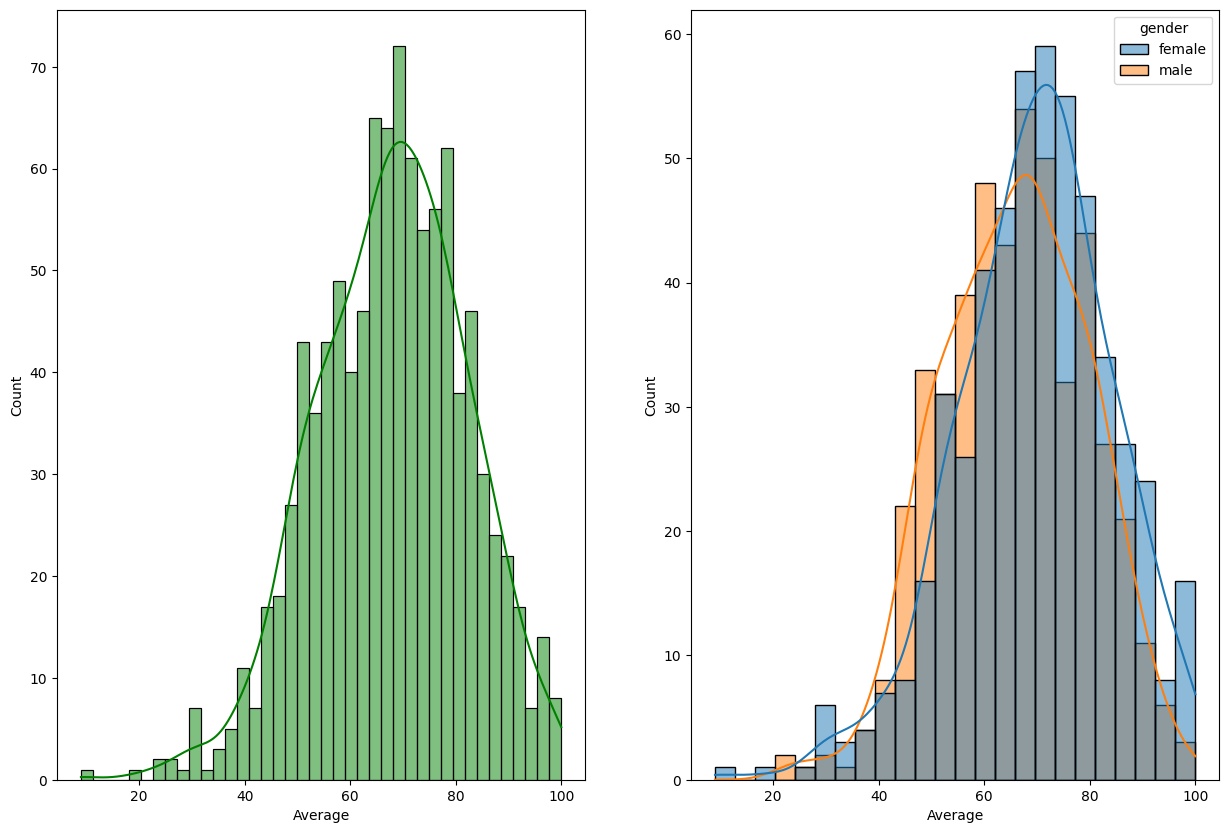

In [93]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df,x='Average',kde=True, bins=40,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',hue='gender',color='k',kde=True)

<Axes: xlabel='Total Score', ylabel='Count'>

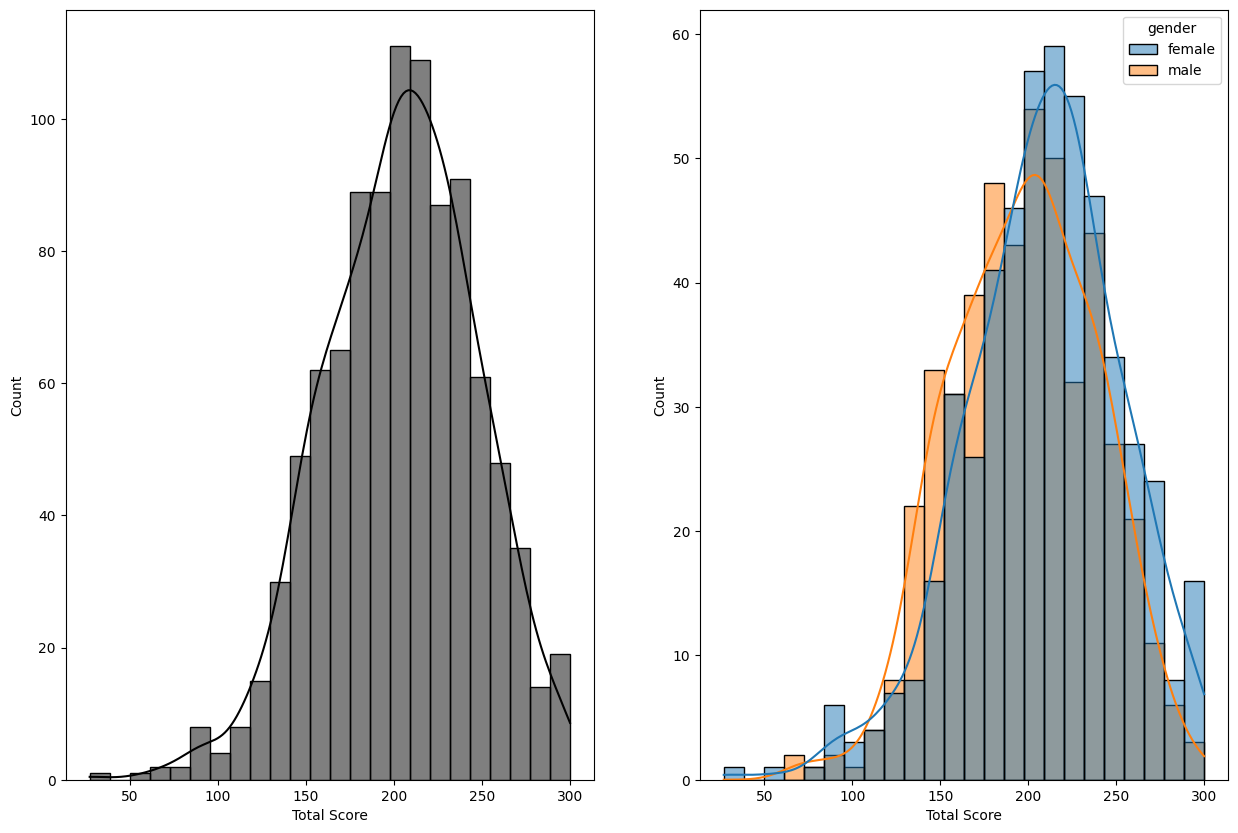

In [94]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',kde=True,color='k')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,color='g',hue='gender')

<Axes: xlabel='Average', ylabel='Count'>

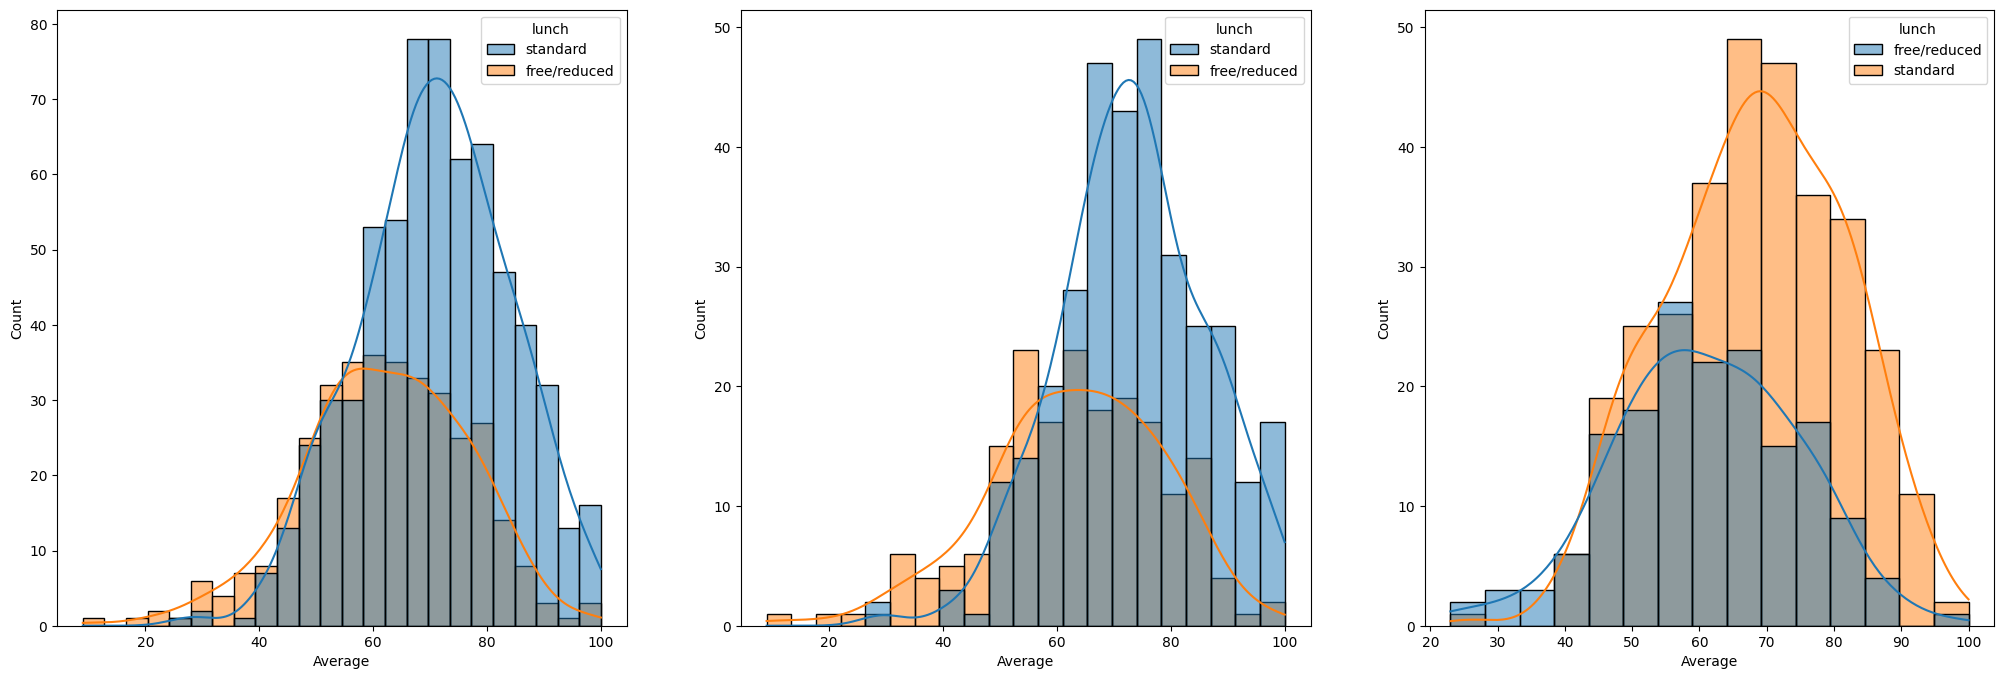

In [95]:
plt.figure(figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df,x="Average",kde=True,color='g',hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='Average',kde=True,color='g',hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='Average',kde=True,color='g',hue='lunch')

standard lunch is more popular during exam time

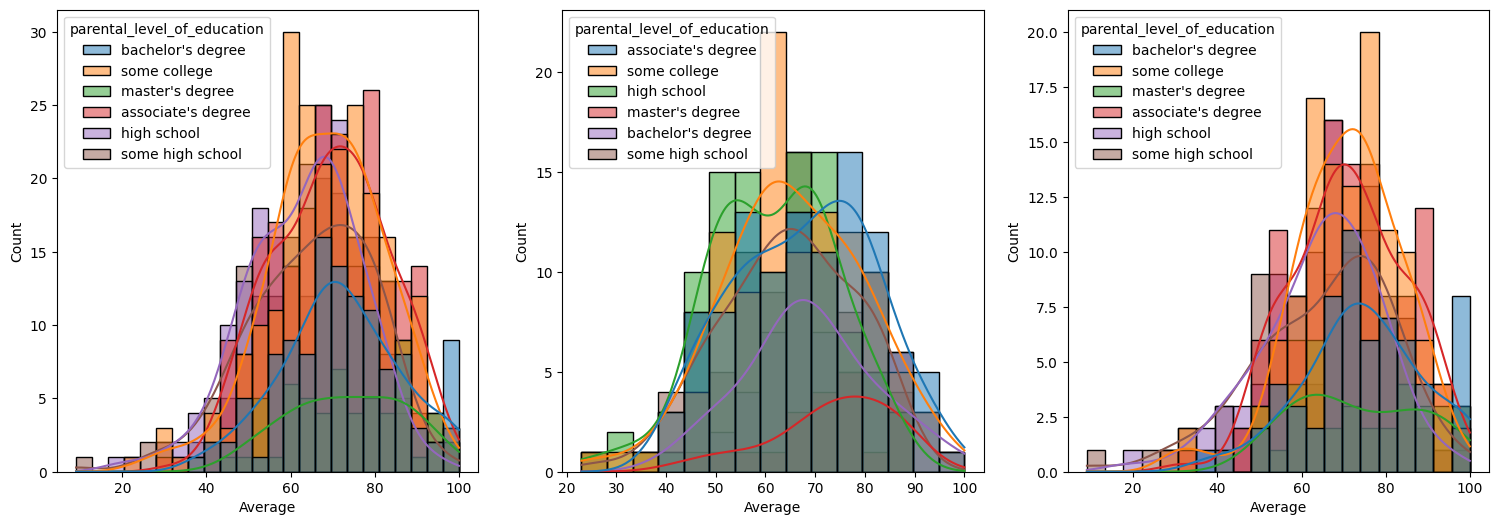

In [96]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.show()

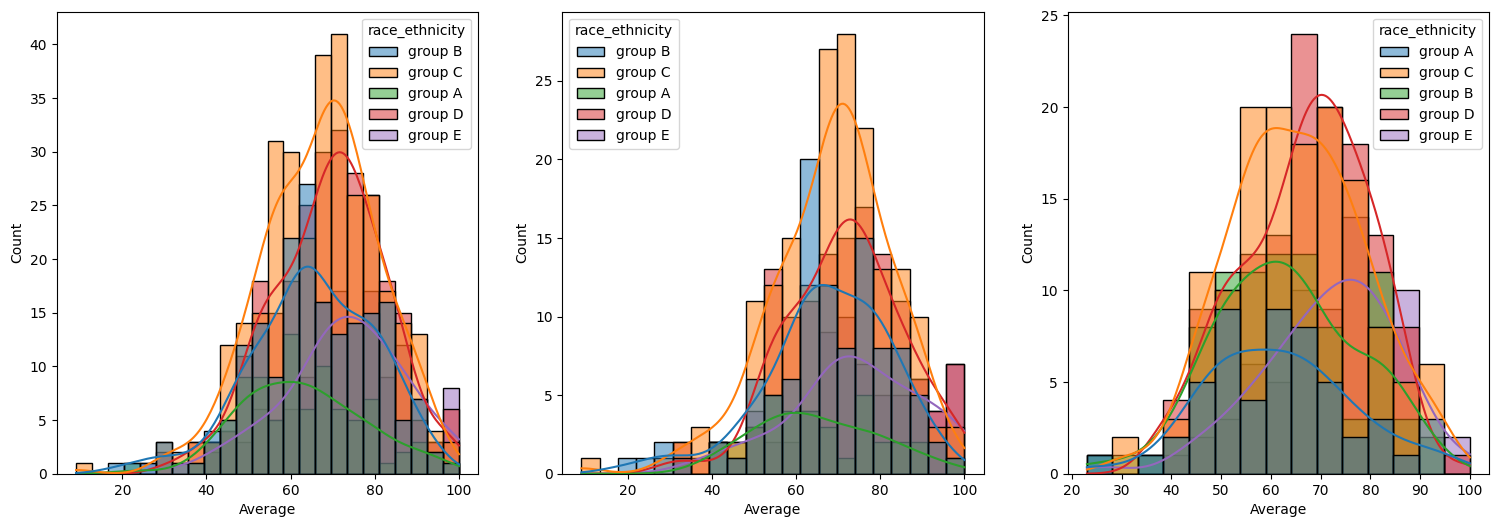

In [97]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.show()

- Group C students tends to perform better irrespective of male or female
- Group A,B and E perform poorly in the exam

In [98]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: title={'center': 'Writing score'}, ylabel='writing_score'>

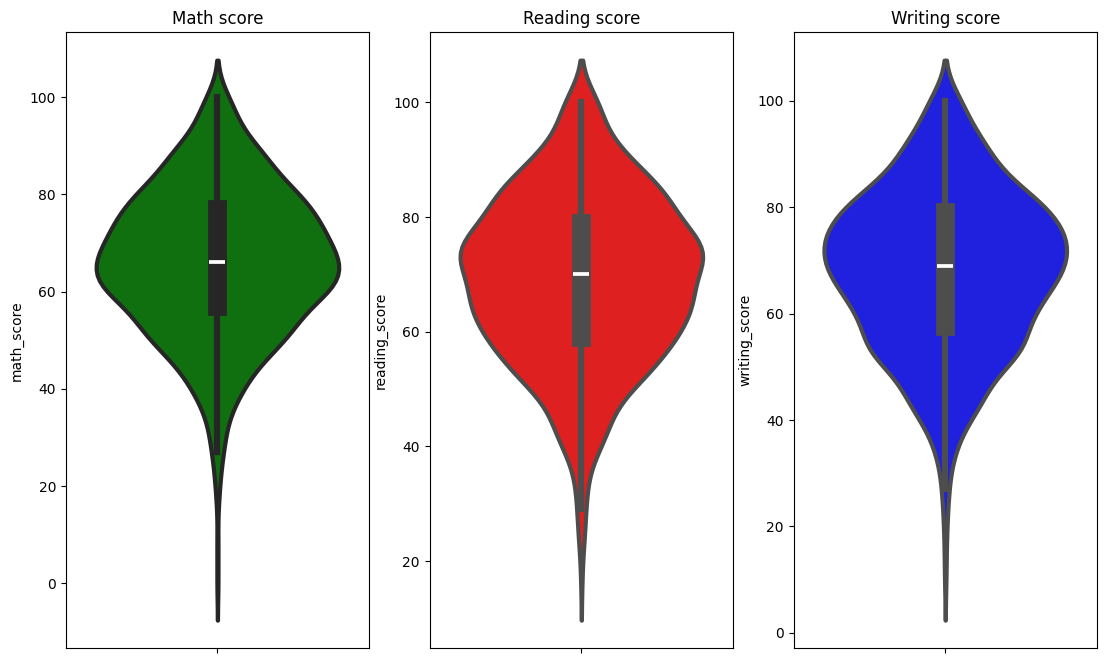

In [99]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title("Math score")
sns.violinplot(data=df,y='math_score',color='g',linewidth=3)
plt.subplot(142)
plt.title("Reading score")
sns.violinplot(data=df,y='reading_score',color='r',linewidth=3)
plt.subplot(143)
plt.title("Writing score")
sns.violinplot(data=df,y='writing_score',color='b',linewidth=3)


- Range between 60-80
- median of score in reading and writing is little better than maths


MULTIVARIATE ANALYSIS

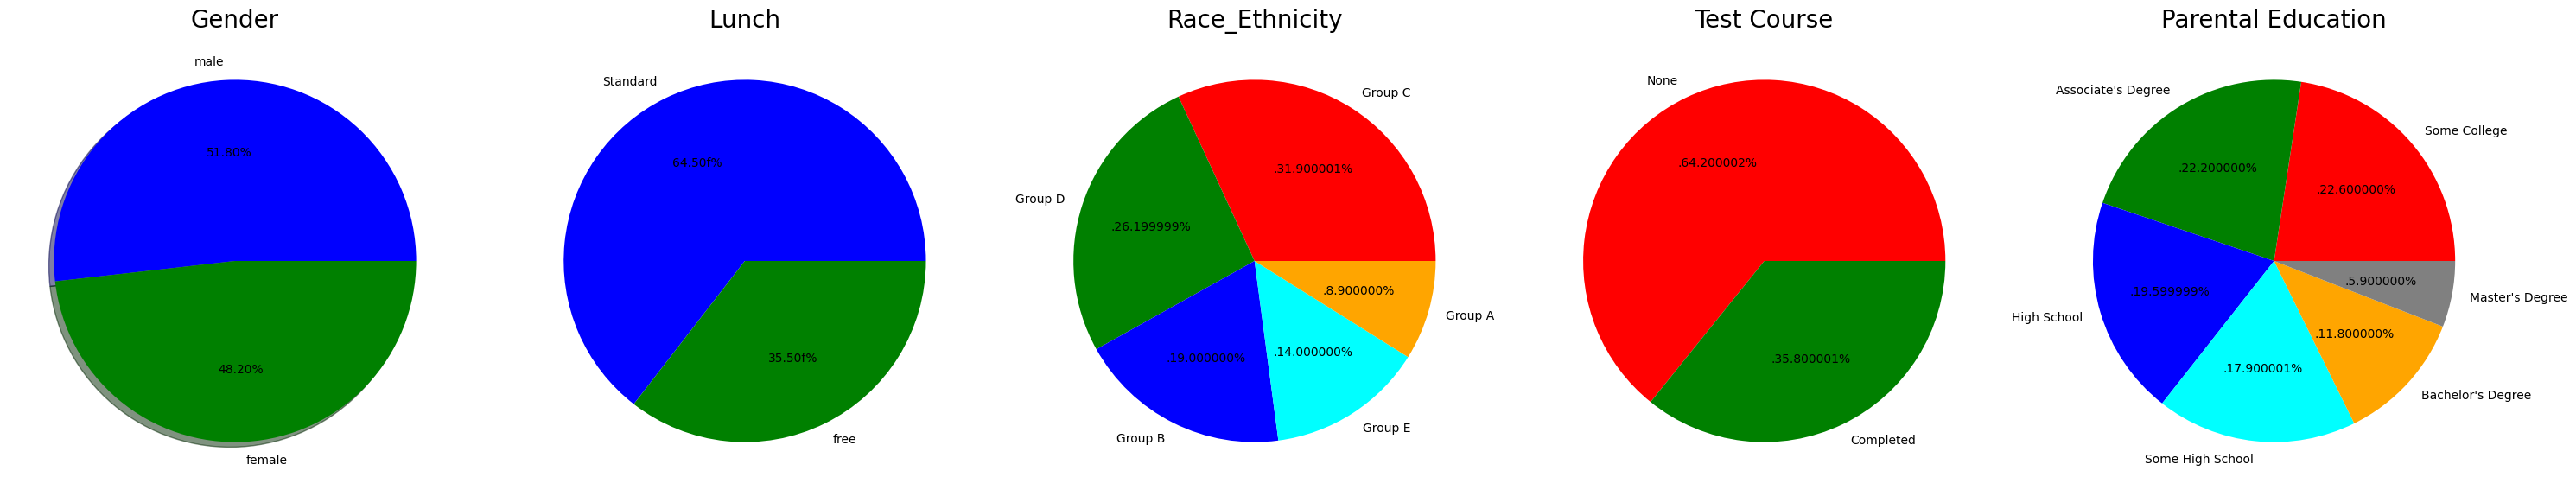

In [100]:
plt.rcParams['figure.figsize']=(30,20)
plt.subplot(151)
size=df['gender'].value_counts()
label=['male','female']
color=['blue','green']

plt.pie(size,labels=label,colors=color,autopct='%.2f%%',shadow=True)
plt.title("Gender", fontsize=20)
plt.axis('off')


plt.subplot(152)
size=df['lunch'].value_counts()
label=['Standard','free']
color=['blue','green']

plt.pie(size,labels=label,colors=color,autopct='%.2ff%%')
plt.title("Lunch", fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


FEATURE-WISE VISUALIZATION


- Does gender have any impact on student's performance
- How is the distribution of gender?

([<matplotlib.patches.Wedge at 0x179006e89d0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06782226650507357, -1.1980818587083752, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.80%'),
  Text(0.03956298879462625, -0.698881084246552, '48.20%')])

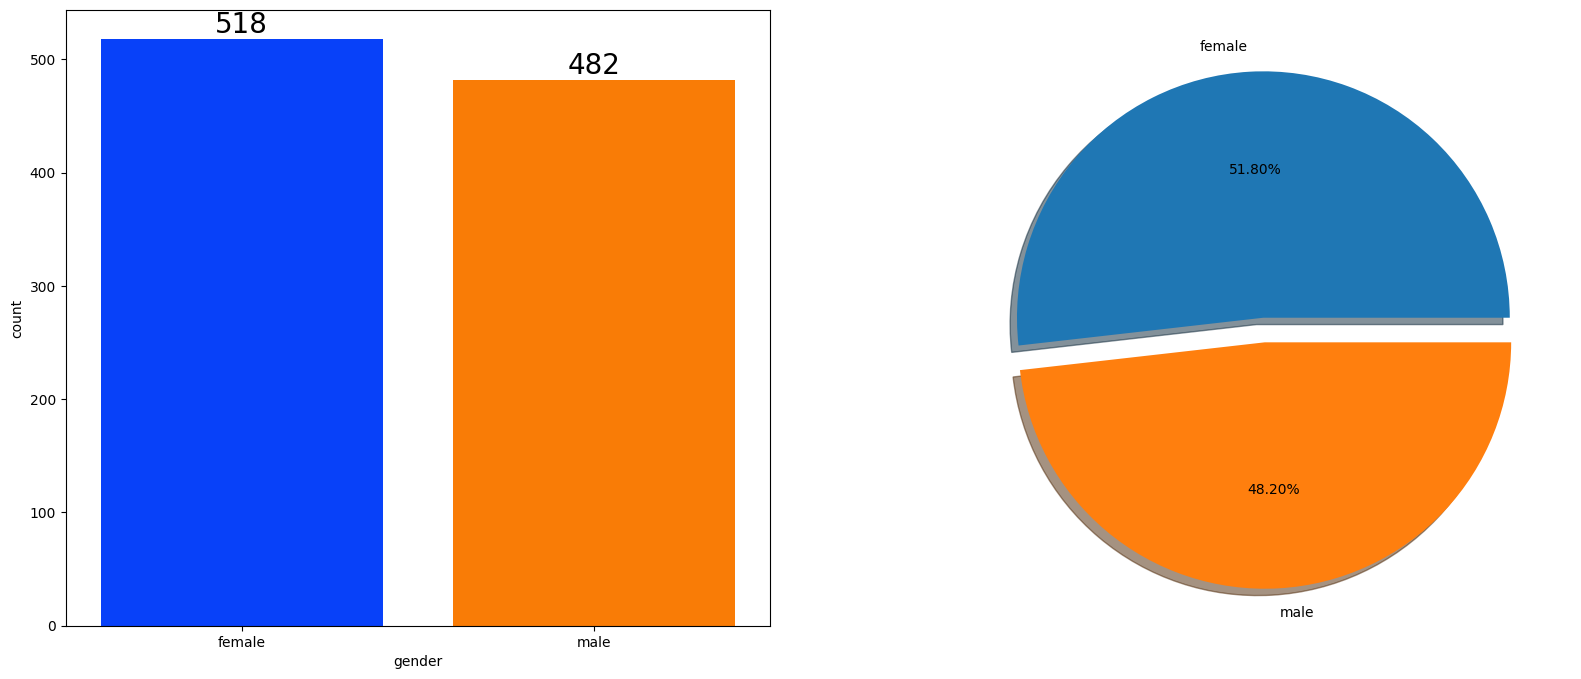

In [101]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['gender'], data=df, ax=ax[0], palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),data=df,explode=[0,0.1],labels=['female','male'],autopct='%.2f%%',shadow=True)

Gender feature has imbalance data with 518 females (51.8%) and 482 men(48.20%)

In [102]:
gender_group=df.groupby('gender').mean(numeric_only=True)
print(gender_group)

        math_score  reading_score  writing_score  Total Score    Average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


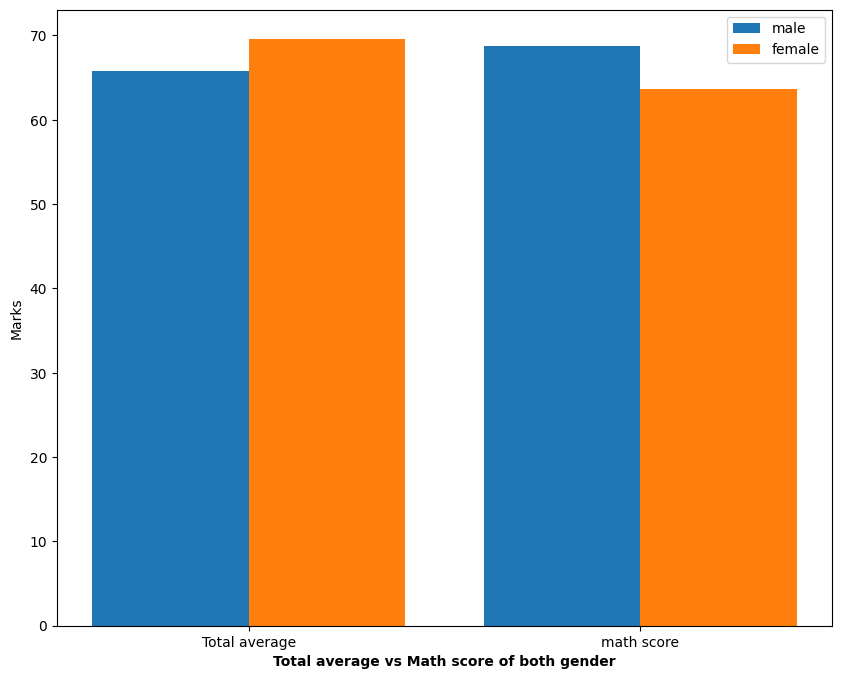

In [103]:
plt.figure(figsize=(10,8))
X=['Total average','math score']

female_score=[gender_group['Average'][0],gender_group['math_score'][0]]
male_score=[gender_group['Average'][1],gender_group['math_score'][1]]

x_axis=np.arange(len(X))

plt.bar(x_axis-0.2,male_score,0.4,label="male")
plt.bar(x_axis+0.2,female_score,0.4,label="female")

plt.xticks(x_axis,X)

plt.ylabel("Marks")
plt.xlabel("Total average vs Math score of both gender",fontweight='bold')
plt.legend()
plt.show()


INSIGHTS
- On average female perform better than men
- total maths scores of men are slighty higher than that of females


RACE AND ETHINICITY 

- how is the distribution of its group
- Does it affect student's performance

In [104]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


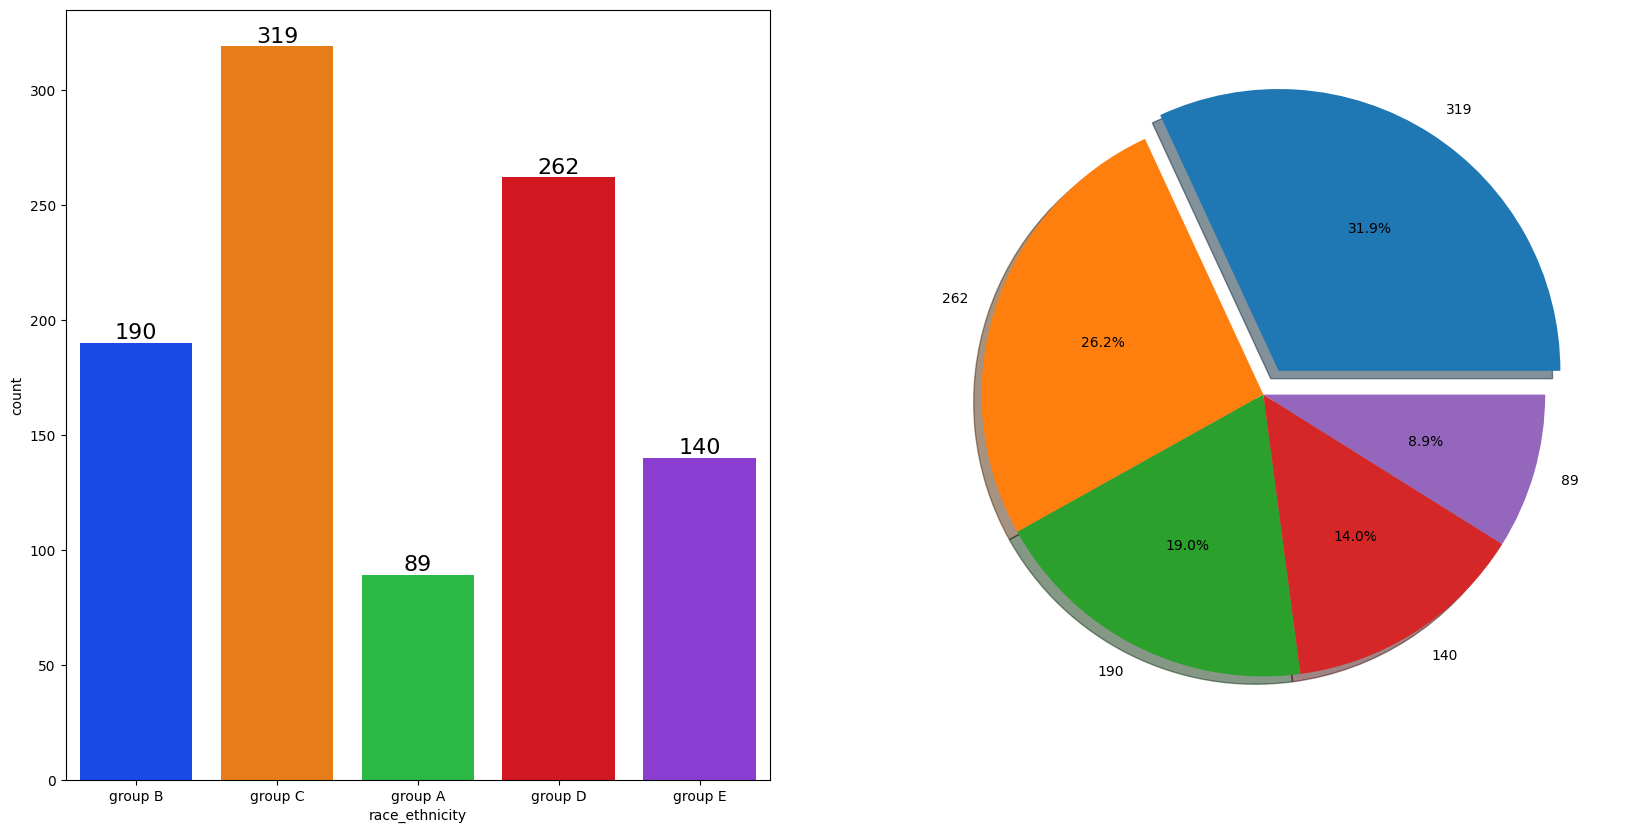

In [105]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['race_ethnicity'],ax=ax[0],saturation=0.80,palette='bright')

for i in ax[0].containers:
    ax[0].bar_label(i,color='black',size=16)

plt.pie(data=df,x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts(),explode=(0.1,0,0,0,0),shadow=True,autopct='%.1f%%')
plt.show()

- Lowest no of student belong to group A
- Most students come from group C and D

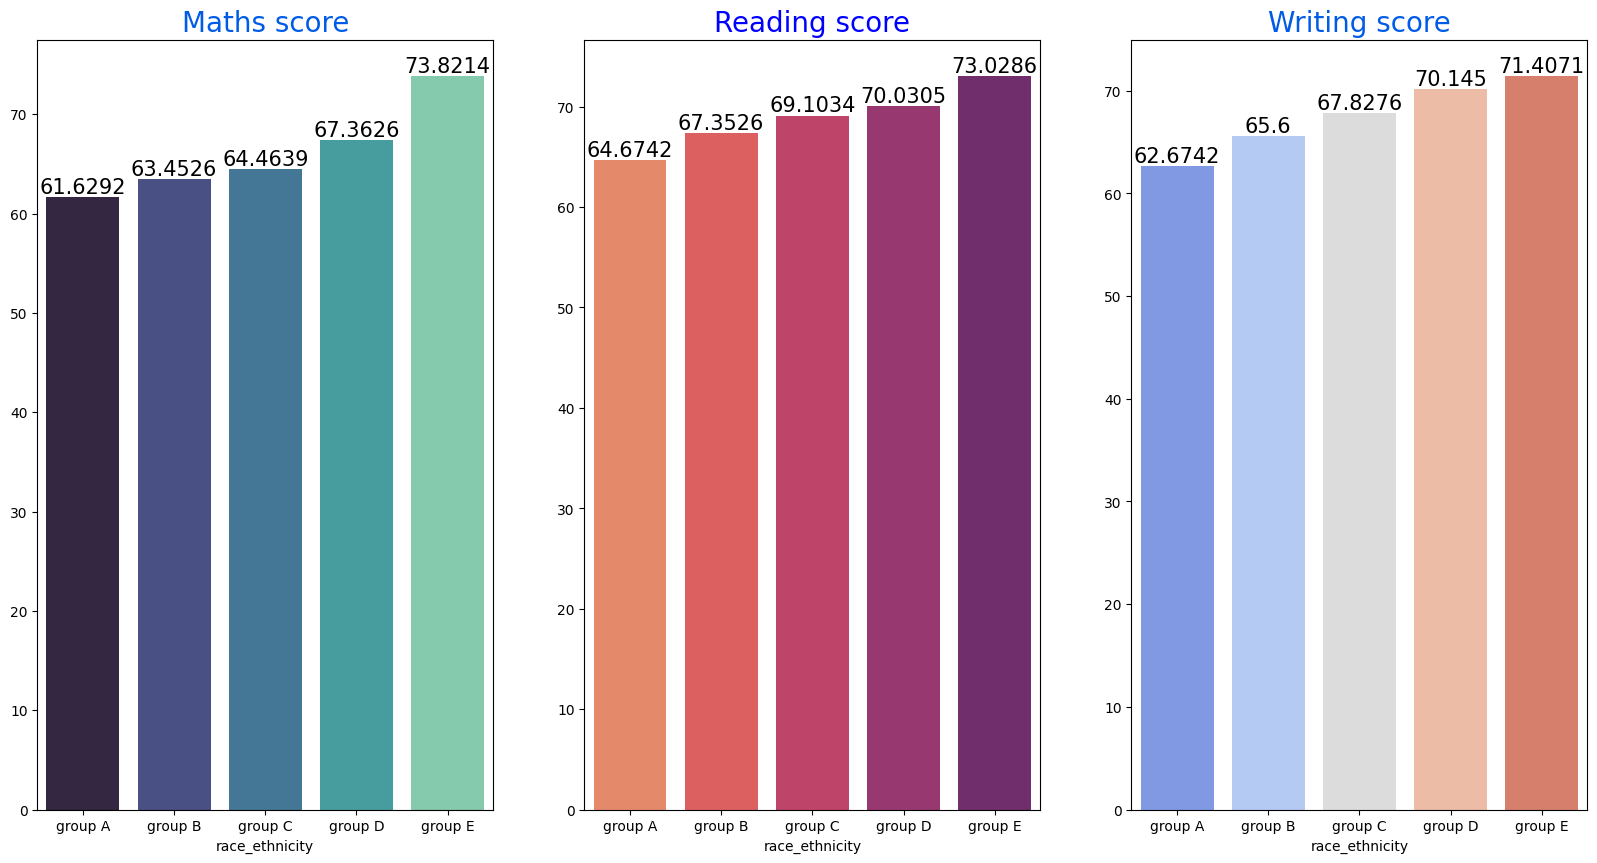

In [107]:
f,ax= plt.subplots(1,3,figsize=(20,10))
grouped_race=df.groupby('race_ethnicity')
sns.barplot(x=grouped_race['math_score'].mean().index,y=grouped_race['math_score'].mean().values,saturation=0.75,palette='mako',ax=ax[0])
ax[0].set_title("Maths score",color='#005ce6',fontsize=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black', fontsize=15)

sns.barplot(x=grouped_race['reading_score'].mean().index,y=grouped_race['reading_score'].mean().values,palette='flare',saturation=0.95,ax=ax[1])
ax[1].set_title("Reading score", color='blue',fontsize=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color="black",fontsize=15)
    
sns.barplot(x=grouped_race['writing_score'].mean().index,y=grouped_race['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


- Group E students have scored highest in all
- Lowest is group A student's performance

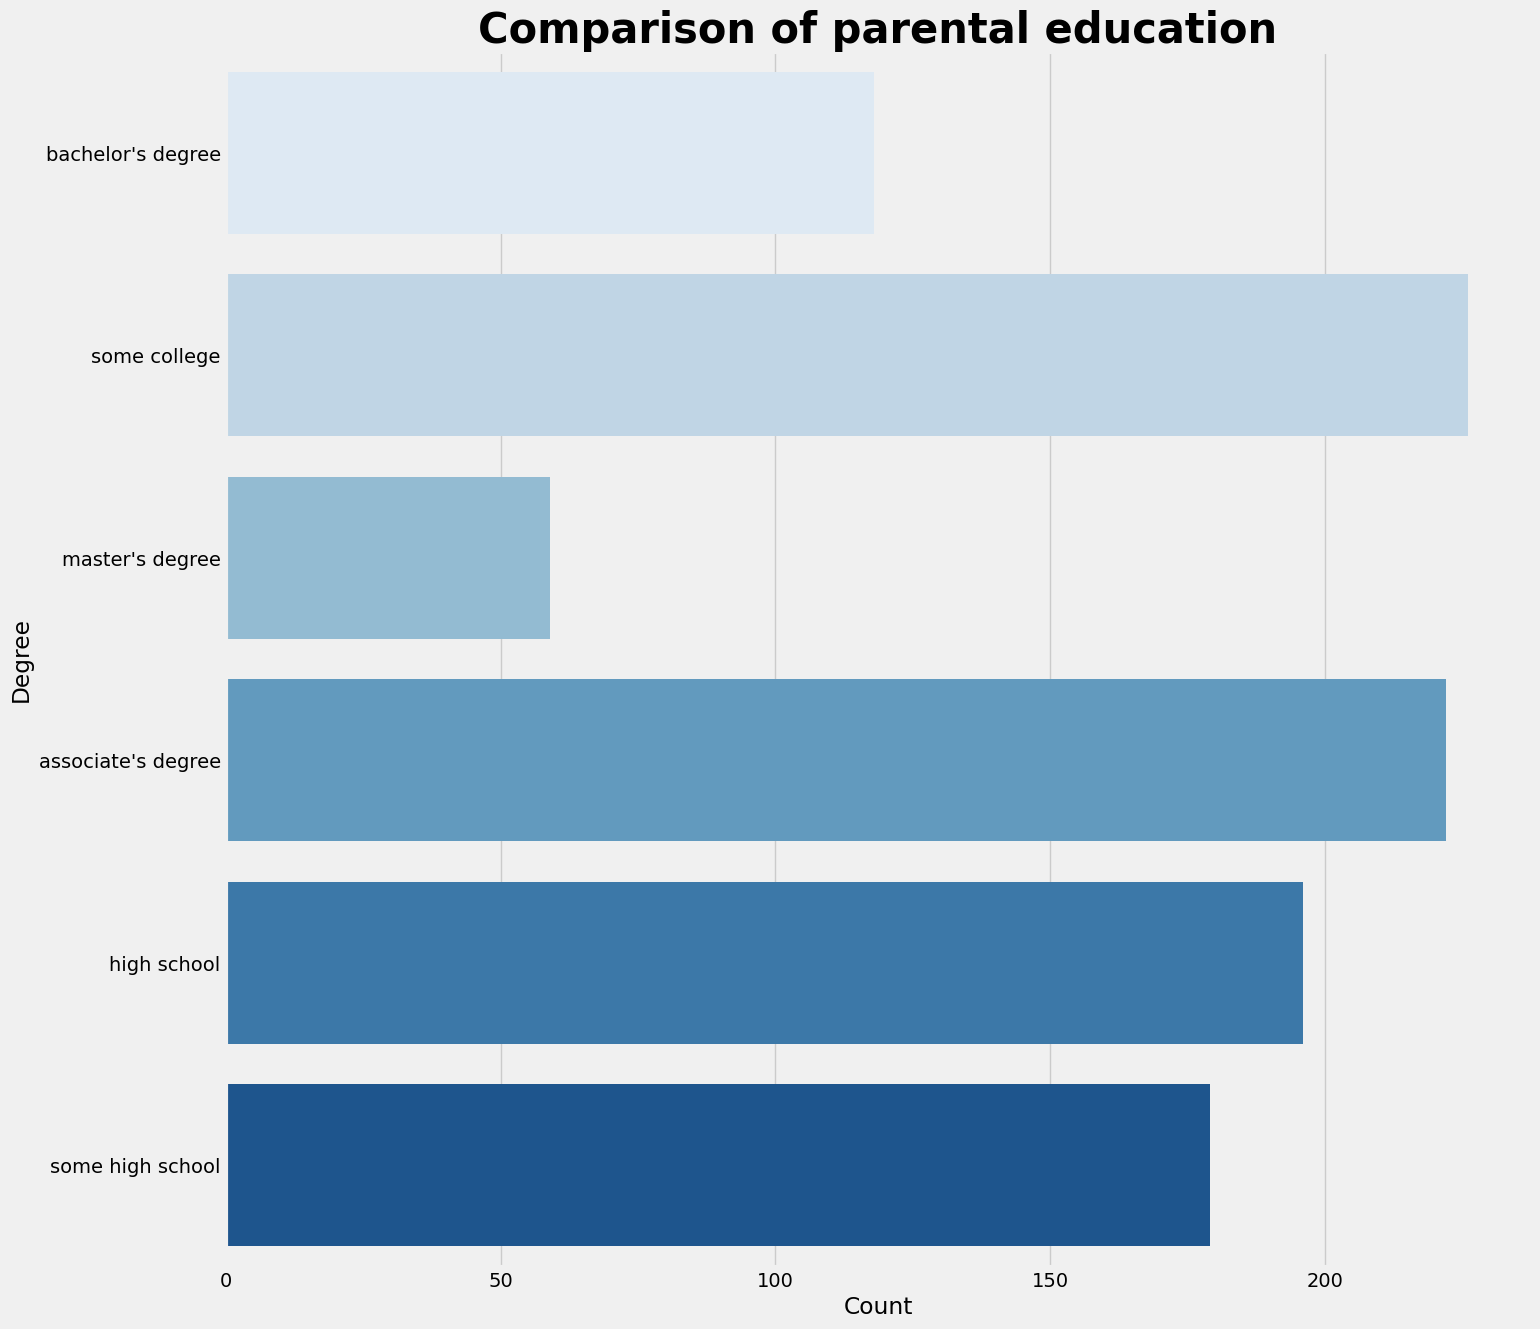

In [115]:
plt.rcParams['figure.figsize']=(15,15)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.ylabel("Degree")
plt.xlabel("Count")
plt.title("Comparison of parental education", fontweight='bold',fontsize=30)
plt.show()

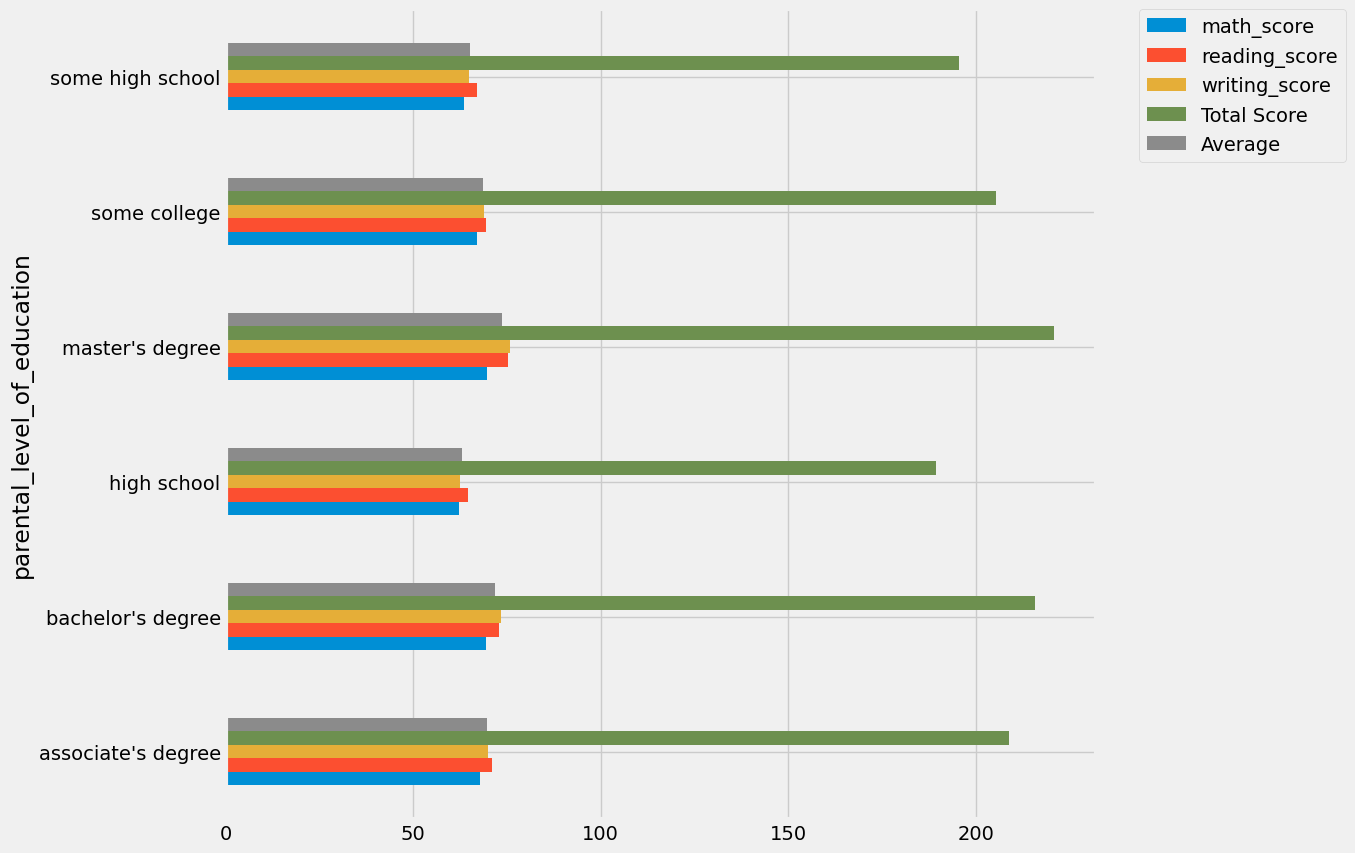

In [121]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

LUNCH

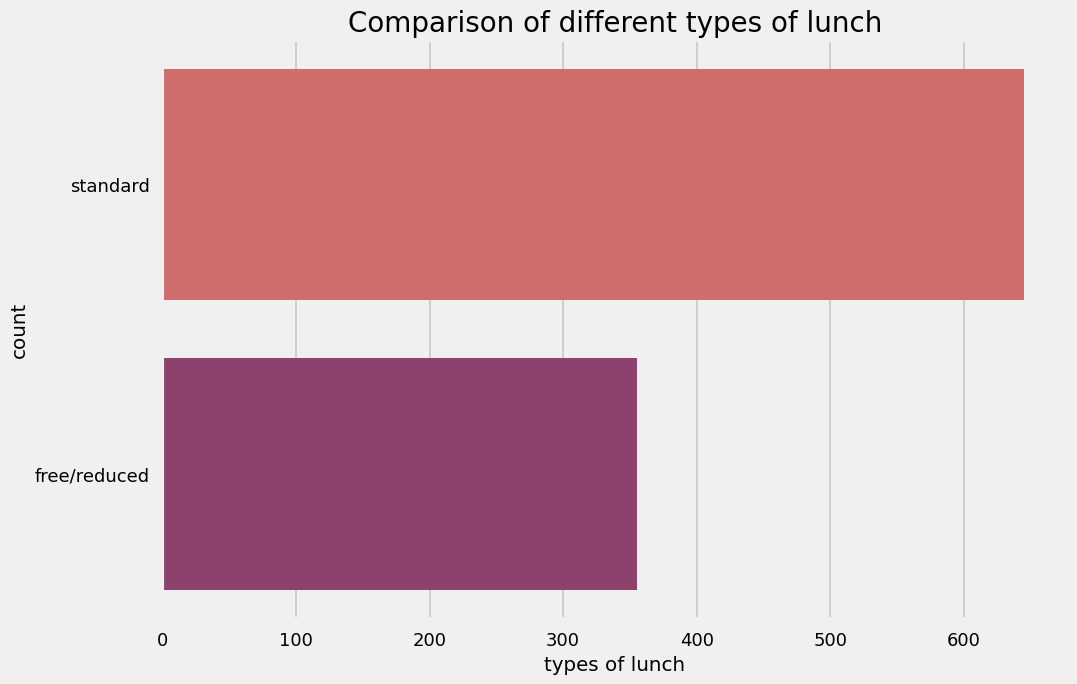

In [126]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'flare')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

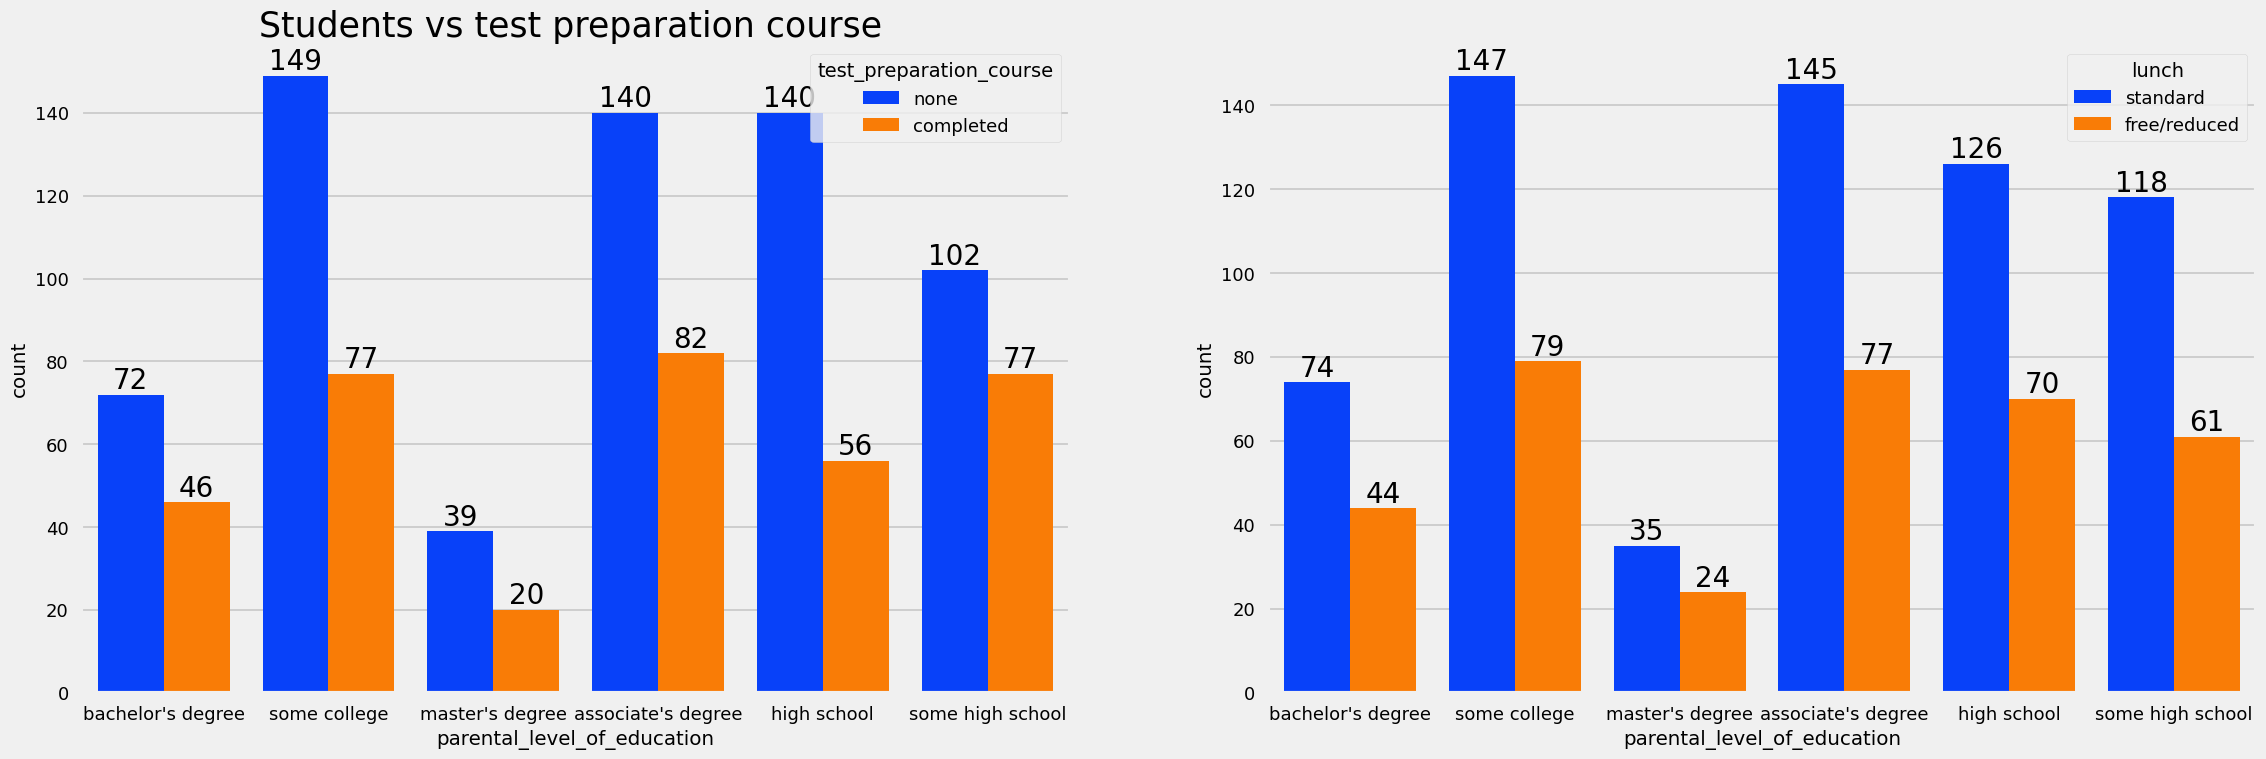

In [132]:
f,ax=plt.subplots(1,2,figsize=(25,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

TEST PREPARATION"

<Axes: xlabel='lunch', ylabel='writing_score'>

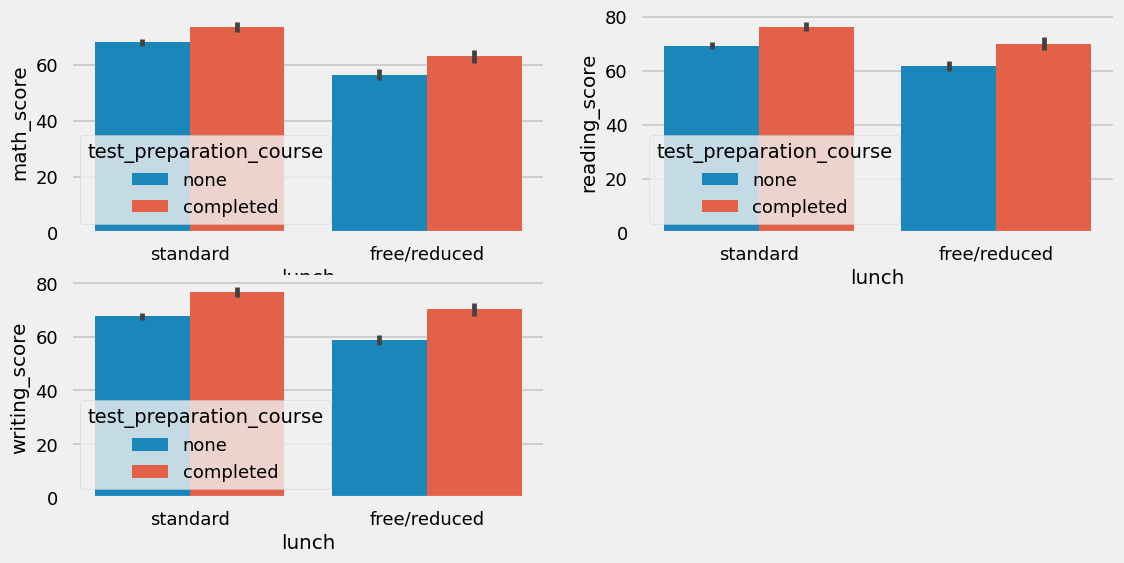

In [133]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

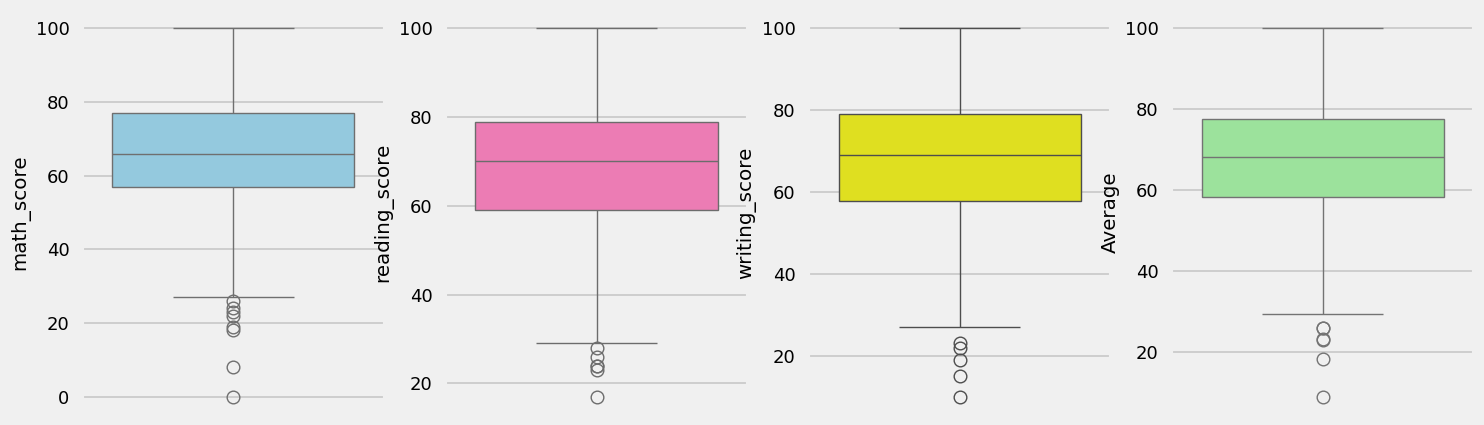

In [135]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

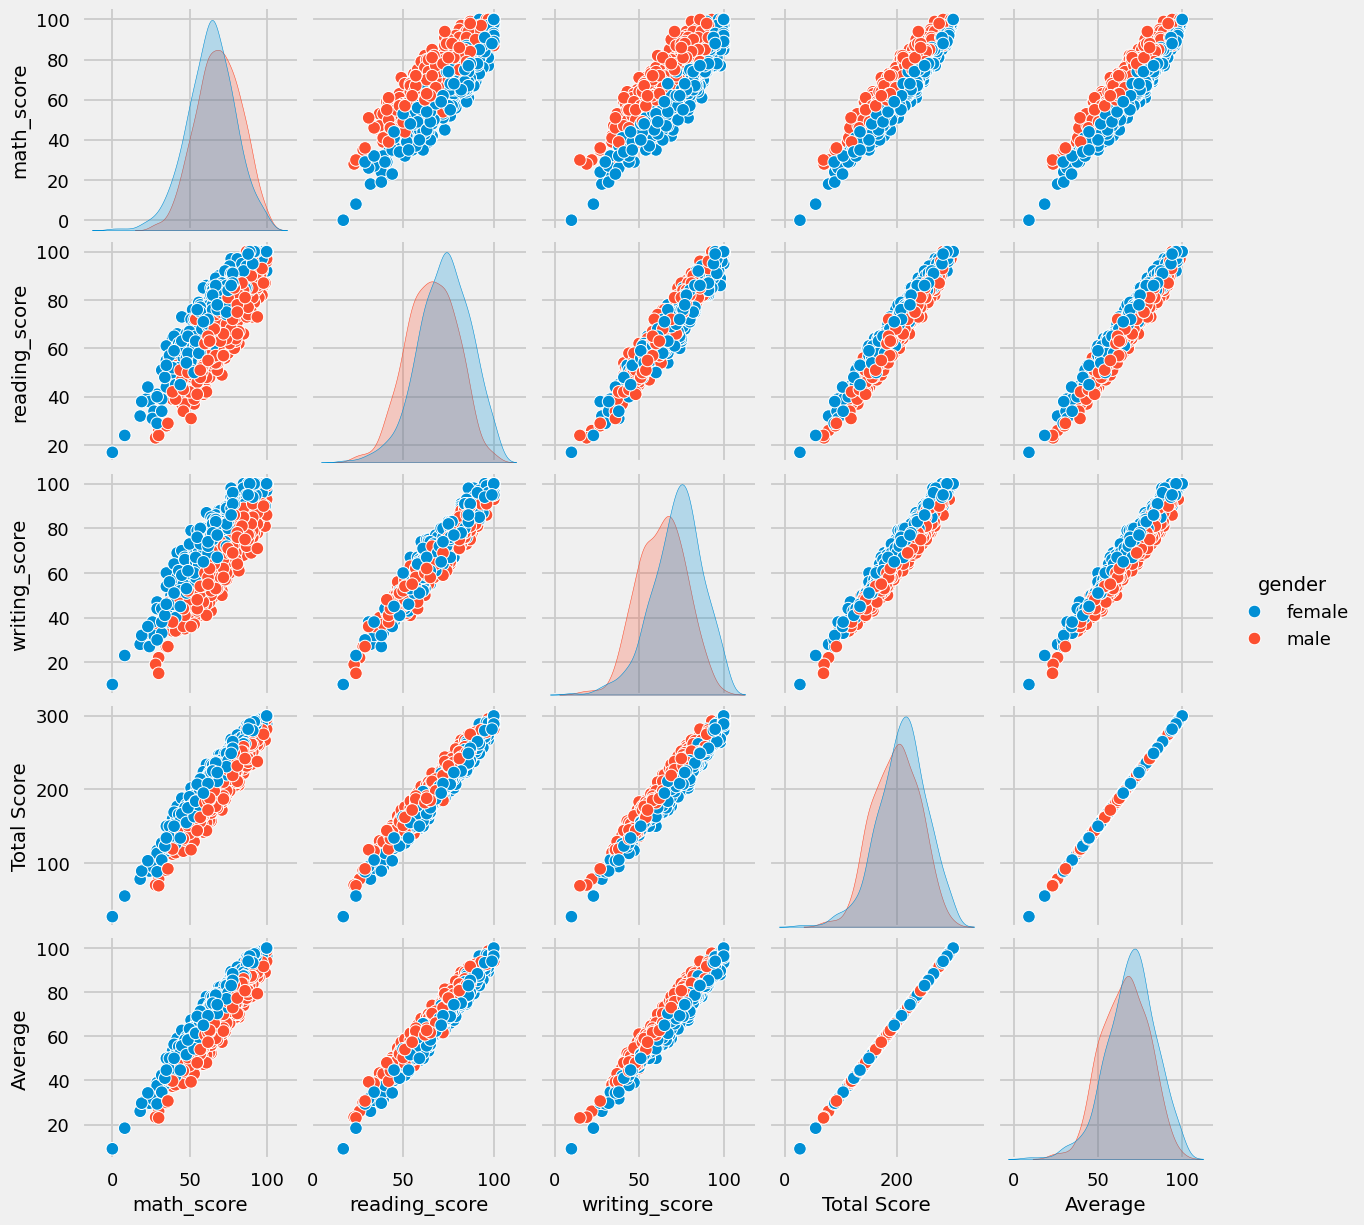

In [136]:
sns.pairplot(df,hue = 'gender')
plt.show

FROM the above graph it is clear that all follow linear proportionality

###  Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.